In [314]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [315]:
class neuron:
    def __init__(self, af_type='sigmoid'):
        self.weights = np.array([])
        self.af_type = af_type

    def activate(self, input):
        return self.activation_function(np.dot(input, self.weights))

    def activation_function(self, a):
        if self.af_type == 'sigmoid':
            return 1/(1+np.exp(a))

In [316]:
class training:
    def __init__(self, l_inputs, l_outputs, training_type='mlf'):
        self.training_type = training_type
        self.l_inputs = l_inputs
        self.l_outputs = l_outputs
    
    def train(self, neuron_tt, eta=0.001, thresh=0.01, max_steps=10000):
        N = np.shape(self.l_inputs)[0]
        N_params = np.shape(self.l_inputs)[1]
        
        if self.training_type == 'mlf':
            weights = np.random.rand(N_params)
            dG = np.ones(N_params)

            weightss = weights
            dGs = dG

            steps = 0

            while all(np.abs(dG) > thresh):
                neuron_tt.weights = weights

                outputs = np.array([])
                for l_input in self.l_inputs:
                    output = neuron_tt.activate(l_input)
                    outputs = np.append(outputs, output)

                dG = np.array([])
                for l_input_col in self.l_inputs.T:
                    dG = np.append(dG, np.sum(np.multiply((self.l_outputs - outputs),l_input_col)))

                weights -= eta*dG
                steps += 1

                weightss = np.append(weightss, weights)
                dGs = np.append(dG, dGs)

                if steps > max_steps:
                    print('Training Failed {}'.format(dG))
                    break
        
        return weights

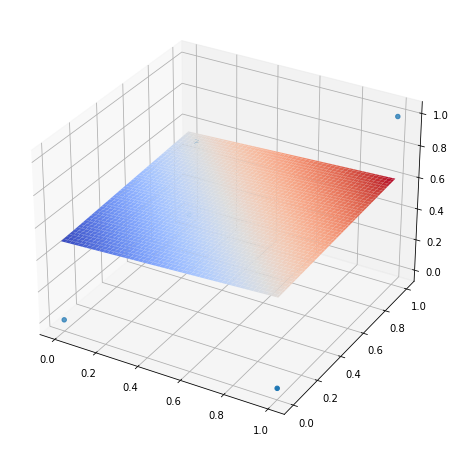

In [317]:
tx = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0.4, 0.4]
    ])
ty = np.transpose(np.array([0, 0, 1, 0, 1]))

ntt = neuron()
tn = training(tx, ty)
w = tn.train(ntt)
ntt.weights = w

x = np.linspace(0, 1, 100)
x11, x22 = np.meshgrid(x, x)
aa = np.empty((100, 100))
for i, x1i in enumerate(x):
    for j, x2i in enumerate(x):
        aa[i,j] = ntt.activate([x1i, x2i])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tx[:,0], tx[:,1], ty)
ax.plot_surface(x11, x22, aa, cmap=cm.coolwarm)
plt.show()